# Part 1


### Importing the correct libraries

In [245]:
#General Libraries for data analysis
import pandas as pd
import numpy as np
import seaborn as sns

# libraries for plotting
from lets_plot import *
LetsPlot.setup_html()
from matplotlib import pyplot as plt
#libraries for table formatting
from pytablewriter import MarkdownTableWriter
# libraries for data exploration (e.g missing values)
import missingno as msno
import sweetviz as sv
#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn import tree
from sklearn.model_selection import cross_val_score
#libraries for train/test split
from sklearn.model_selection import TimeSeriesSplit, train_test_split
#libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# libraries for metric definition (model evaluation)
from sklearn.metrics import balanced_accuracy_score,accuracy_score,  confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score, average_precision_score,make_scorer, classification_report 
from sklearn.metrics import mean_squared_error, r2_score



### Loading the Data


In [220]:
yuan = pd.read_stata("yuan_inflation_data.dta")


##### Exploring the Data

In [221]:
#Basic overview:
print(yuan.shape)
yuan.head()

(96, 12)


,year,emperor,emperorname,disaster,nomgrants,external,unification,rebellion,nominal,totalwar,pop,cpi
0,1260,1,shizu,1,120755,0,1,2,73352,3,7092495.0,1.000000
1,1261,1,shizu,1,121713,0,1,1,39139,2,7092495.0,1.036895
2,1262,1,shizu,15,121765,1,5,1,80000,7,7380730.0,1.073790
3,1263,1,shizu,12,127751,0,1,0,74000,1,7895550.0,1.110685
4,1264,1,shizu,10,121095,0,1,0,89208,1,7940975.0,1.147580


In [153]:
yuan.describe

<bound method NDFrame.describe of     year  emperor emperorname  disaster  nomgrants  external  unification  \
0   1260        1       shizu         1     120755         0            1   
1   1261        1       shizu         1     121713         0            1   
2   1262        1       shizu        15     121765         1            5   
3   1263        1       shizu        12     127751         0            1   
4   1264        1       shizu        10     121095         0            1   
..   ...      ...         ...       ...        ...       ...          ...   
91  1351       10     huizong        15      12250         0            0   
92  1352       10     huizong        13     177512         0            0   
93  1353       10     huizong        25     205005         0            0   
94  1354       10     huizong        24     111305         0            0   
95  1355       10     huizong         3       1504         0            0   

    rebellion   nominal  totalwar        

In [222]:
# Checking for missing data:

yuan.isnull().sum()

year           0
emperor        0
emperorname    0
disaster       0
nomgrants      0
external       0
unification    0
rebellion      0
nominal        0
totalwar       0
pop            0
cpi            0
dtype: int64

No missing data which is conveniant

In [223]:
#Checking Intersting plots

grouped_data = yuan.groupby('emperorname', as_index=False)['totalwar'].sum()
grouped_data = grouped_data.sort_values(by='totalwar', ascending=True)


(
        ggplot(grouped_data, aes(y='emperorname', x='totalwar')) +
        geom_bar(stat='identity', fill='blue', color='black', alpha=0.7) +
        ggtitle("Total Wars Per Emperor") +
        xlab("Total Wars") +
        ylab("Emperor") +
        theme_minimal()
        
)




Emperor Huizong saw the most wars in his reign

In [224]:
(
        ggplot(yuan, aes(y='cpi', x='year')) +
        geom_line( color='black') +
        ggtitle("CPI over time") +
        xlab("Year") +
        ylab("CPI rate") +
        theme_minimal()
        
)

It will be interesting to see how cpi correlates with number of wars as we continue the analysis

___

#### What are the years with the top 10 highest number of total wars? How many of those years (and which ones) overlap with the years with the top 10 nominal money issues?

In [225]:
yuan['year']

0     1260
1     1261
2     1262
3     1263
4     1264
      ... 
91    1351
92    1352
93    1353
94    1354
95    1355
Name: year, Length: 96, dtype: int16

In [226]:
# Grouping data by year and then sorting in descending order

grouped_year_data = yuan.groupby('year', as_index=False)['totalwar'].sum()
grouped_year_data = grouped_year_data.sort_values(by='totalwar', ascending=False)

#Selecting the top 10:

top_10_war = grouped_year_data[:10]


In [227]:
#Outputting the top 10 war
top_10_war 

,year,totalwar
92,1352,40
15,1275,30
95,1355,26
68,1328,17
65,1325,12
93,1353,11
67,1327,11
71,1331,11
94,1354,10
63,1323,10


In [228]:
# Doing the same for nominal money issues

grouped_nominal_data = yuan.groupby('year', as_index=False)['nominal'].sum()
grouped_nominal_data = grouped_nominal_data.sort_values(by='nominal', ascending=False)

top_10_nominal = grouped_nominal_data[:10]

In [229]:
top_10_nominal

,year,nominal
95,1355,49500000
50,1310,36259200
94,1354,34500000
93,1353,19500000
92,1352,19500000
52,1312,11211680
51,1311,10900000
53,1313,10200000
54,1314,10100000
42,1302,10000000


In [231]:
# Find overlap
overlap_wars_nominal = set(top_10_war["year"]) & set(top_10_nominal["year"])
print(f"Overlap years: {overlap_wars_nominal}, Count: {len(overlap_wars_nominal)}")




Overlap years: {1352, 1353, 1354, 1355}, Count: 4


---

#### Q2b : Similarly, what are the years with the top 10 highest number of disasters? How many of those years (and which ones) overlap with the years with the top 10 nominal money issues?

In [232]:
#And again with the disaster varaible

grouped_disaster_data = yuan.groupby('year', as_index=False)['disaster'].sum()
grouped_disaster_data = grouped_disaster_data.sort_values(by='disaster', ascending=False)
top_10_disaster = grouped_disaster_data[:10]


#Finding overlap:
overlap_disaster_nominal = set(top_10_disaster["year"]) & set(top_10_nominal["year"])
print(f"Overlap years: {overlap_disaster_nominal}, Count: {len(overlap_disaster_nominal)}")



Overlap years: set(), Count: 0


This means that there are no overlaps between years with the highest disasters and that of highest nominal money supply

___

#### 2c. Create a single plot that shows the evolution over time of CPI, total wars, disasters and nominal money issues (be mindful of variable scaling!). What does this plot tell you?

In [233]:
# Scaling the variables using MinMaxScaler:

scalar = MinMaxScaler()
scaled_columns = ['cpi', 'totalwar', 'nominal', 'nomgrants'] #Scaling nomgrants for later
yuan_scaled  = yuan.copy()
yuan_scaled[scaled_columns] = scalar.fit_transform(yuan_scaled[scaled_columns])

### Why I Used `MinMaxScaler`

The **MinMaxScaler** was used to normalise the data before plotting, as the variables in our dataset (such as CPI, total wars, and nominal money issues) likely have vastly different ranges which can adversely impact the regression interpretation. It is also unlikely that the variables will be normally distributed too, so I didn't go with a nomralisation z-score method.

Normalising these values this way helps to bring them all to a comparable scale, allowing us to observe their relative trends more easily in the same plot. By scaling the data between 0 and 1, we can better understand their relationships without one variable dominating the visualization due to its larger range.

### Formula for Min-Max Scaling

The formula used by the **MinMaxScaler** to transform each value is:

$$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:

- `X` is the original value of the variable.
- `X_min` is the minimum value of the variable.
- `X_max` is the maximum value of the variable.
- `X_scaled` is the scaled value between 0 and 1.

This formula subtracts the minimum value of the feature, then divides by the range of the data (max - min), ensuring that the transformed value will always lie between 0 and 1.


I used melting to reshape the data from a wide format to a long format. This allows me to combine the cpi, totalwar, and nominal variables into a single column, with another column indicating the variable type. This structure enables ggplot to easily differentiate the variables and plot them with distinct colors on the same graph

In [234]:
# using melt function
yuan_scaled_melted = yuan_scaled.melt(id_vars=["year"], value_vars=["cpi", "totalwar", "nominal"], 
                                      var_name="Variable", value_name="Value")

# Create the plot
(
    ggplot(yuan_scaled_melted) +
    geom_line(aes(x='year', y='Value', color='Variable'), size=1.5) +  
    ggtitle("Scaled CPI, Total Number of Wars, and Nominal Money Over Time") +
    xlab("Year") +
    ylab("Value") +
    scale_color_manual(values={'cpi': 'black', 'totalwar': 'red', 'nominal': 'blue'}) + 
    theme_minimal() +
    theme(
        plot_title=element_text(size=16, face='bold'),
        axis_title=element_text(size=14),
        axis_text=element_text(size=12),
        legend_title=element_text(size=14),
        legend_text=element_text(size=12)
    )
)



Some points can be made here:

1. CPI has a clear uptrend 
2. Nominal money and the number of total wars appear to follow similar trajectories throughout most of the time period, with two distinct peaks between the years 1270 and 1310. However, after 1330, both variables converge and track closely with one another, suggesting a possible correlation or shared underlying factor influencing both trends.

___

# Part 2 - Creating a Regression Model

- I am first going to design a basic regression model that will simply use all varaibles except emperorname to predict cpi, WITHOUT lagged variables
- My improved model will utilise lagged varaibles to test whether this makes a difference

In [235]:
# Creating training and testing set
train_df = yuan_scaled[yuan_scaled['year'] < 1327]
test_df = yuan_scaled[yuan_scaled['year'] >= 1327]

In [236]:

#Creating training and test set data by dropping the relevant features
X_train = train_df.drop(columns = ['cpi', 'emperorname', 'year'])
y_train = train_df['cpi']

X_test = test_df.drop(columns=['cpi', 'emperorname', 'year'])  
y_test = test_df['cpi']  

#Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


#Make predictions on the test data
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)



print(f'Mean Squared Error: {mse:.3g}')
print(f'R² Score: {r2:.3g}')
print(f'Mean Absoloute Error : {mae:.3g}')




Mean Squared Error: 0.0471
R² Score: -0.0898
Mean Absoloute Error : 0.0471


The linear regression model's performance was assessed using three key metrics, noting that we scaled CPI:  

- **Mean Squared Error (MSE)**: **0.0471**  
  - This value represents the average squared difference between actual and predicted CPI values. A lower MSE is desirable, but in this case, the error suggests that the model struggles to capture the underlying pattern.  

- **R² Score**: **-0.0898**  
  - The R² score measures how well the independent variables explain the variation in CPI. An ideal R² is close to 1, indicating a good fit. However, the negative score suggests that something in the engineering hasn't gone right... This model presumes that higher nominal money supply has almost no relation to cpi, which goes against economic theory. 

- **Mean Absolute Error (MAE)**: **0.0471**  
  - This metric represents the average absolute difference between actual and predicted values. While MAE is useful for understanding prediction accuracy, the high value relative to the scale of CPI indicates significant prediction errors.  

### Interpretation and Next Steps  
The poor performance, particularly the negative R² score, suggests that a simple linear model may not be suitable for predicting CPI based on the selected features chosen. Instead the use of lagging varaibles should be used which will soon be used


#### Residual behaviour

Linear Regression uses numerous assumptions, one being: The relationship between independent variables X (totalwars, nomgrants... etc) and y (CPI) is linear. This leads to us assuming that residual errors should be randomly distributed around zero and if there is some relation betwen residuals, a liner regression may not have been the best method to use.

In [237]:
#Residuals plot:

residuals_toplot = pd.DataFrame({"Predictions": y_pred,
                                 "Residuals" : np.array(y_test) - y_pred})

(
    ggplot(residuals_toplot, aes("Predictions", "Residuals"))+
    geom_hline(yintercept =-0, linetype = 'dashed')+
    geom_smooth(method='loess', color='red', se=False)+
    geom_point()+
    theme(panel_grid_minor = element_blank())+
    labs(x = 'Fitted Values', y= 'Residuals')
)

- Clearly there is a pattern in the residual plots which is usually indicative of heterscedasticity - which implies that the variance of the error terms in the regression are not all the same - which is usually a fundamental assumption in econometrics.

- Interestingly this occurs after a value of say 0.32 - in fact we can limit the x-axis to check this:

In [238]:

(
    ggplot(residuals_toplot, aes("Predictions", "Residuals"))+
    geom_hline(yintercept =-0, linetype = 'dashed')+
    geom_smooth(method='loess', color='red', se=False)+
    geom_point()+
    theme(panel_grid_minor = element_blank())+
    labs(x = 'Fitted Values', y= 'Residuals')+
    xlim(0.26, 0.34)+
    ylim(-0.1,0.2)
)

___

### 2. Trying to make a better model:

By including previous time steps (lags) as input features, we enable the model to capture temporal dependencies and identify patterns or trends that evolve over time. For instance, when predicting variables like CPI, incorporating lagged features (e.g., cpi_lag1, nominal_lag1) helps the model understand how past values influence future outcomes. Without lagged features, the model would lack the necessary context to make predictions based on historical patterns, which are crucial for accurate time series forecasting. Due to there being a few features that all seem relevant, I will refrain from using the likes of ridge or lasso regression

In [239]:
#Lagging features

lag_features = ['cpi', 'nominal',  'nomgrants']

for feature in lag_features:
    yuan_scaled[f'{feature}_lag1'] = yuan.groupby('emperorname')[feature].shift(1)

yuan_lagged = yuan_scaled.dropna().reset_index(drop=True)


In [243]:
from sklearn.linear_model import Ridge, Lasso

#Creating new training and testing datasets based on the same years
train_df = yuan_lagged[yuan_lagged['year'] < 1327]
test_df = yuan_lagged[yuan_lagged['year'] >= 1327]


#Creating training and test set data by dropping the relevant features but also ones that are irrelevant eg emperorname
X_train = train_df.drop(columns = ['cpi', 'emperorname', 'year'])
y_train = train_df['cpi']

X_test = test_df.drop(columns=['cpi', 'emperorname', 'year'])  
y_test = test_df['cpi']  

#Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


#Making predictions on the test data
y_pred = model.predict(X_test)

#Evaluatingthe model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)


print(f'Mean Squared Error: {mse:.3g}')
print(f'R² Score: {r2:.3g}')
print(f'Mean Absoloute Error : {mae:.3g}')


Mean Squared Error: 0.000944
R² Score: 0.979
Mean Absoloute Error : 0.000944


- **Model Improvement:** The new model has clearly improved, with both MSE and MAE reduced by a factor of 10 while remaining equivalent.  
- **Increased Accuracy:** The significant reduction in error suggests a more precise model with improved generalization capability.  
- **R² Score Enhancement:**  
  - The R² score has not only increased substantially but has also changed direction, indicating a positive relationship between variables such as nominal money and nominal grants on CPI.  
  - More specifically, **98% of the variation in CPI** can now be explained by our selected variables, demonstrating a much stronger model fit.  

___

# Part 3

Question 1:

In [188]:
# Reading in the dataset
df = pd.read_csv('BoE_interest_rates.csv')

In [189]:
# Simple initial checks


print(df.columns)
#There are only 3 columns, data, rate and rate change. Rate_change is either 1 or -1 depending on direction of change.



print(df.head())
# Date is in a year-month-day format



Index(['Date', 'Rate', 'rate_change'], dtype='object')
         Date  Rate  rate_change
0  1997-05-06  6.25            1
1  1997-06-06  6.50            1
2  1997-07-10  6.75            1
3  1997-08-07  7.00            1
4  1997-11-06  7.25            1


Although simply looking at the dataset hints at the rate change occuring 'every one in a while', it's better to plot the whole picture:

In [190]:
# Checking the rate setting events occur every once in a while

df['Date'] = pd.to_datetime(df['Date'])

(

    ggplot(df) + 
    geom_line(aes(x='Date', y='Rate'), color='blue', size=1.5) + 
    geom_point(aes(x='Date', y='Rate', color='rate_change'), size=3, show_legend= False) + 
    scale_color_manual(values={1: 'red'}) + 
    labs(title='Rate over Time with Rate Change Events', x='Date', y='Rate') 
    

)

___

Downloading economics indicators data frame and into a new dataframe, assigning to each row the average values of indicators (e.g., GDP, exchange rates, gilt yield, unemployment rates, CPIH, and CCI) for the last three months leading up to each rate setting event.

In [191]:
# Reading in the dataset

df2 = pd.read_csv('economic_indicators_interest_rate_setting.csv')

# Convert date to datetime:

df2['Date'] = pd.to_datetime(df2['Date'])

# Calculating 3 month moving average:

def three_month_avg(rate_date, indicators_df):
    start_date = rate_date - pd.DateOffset(months = 3)
    relevant_data = indicators_df[(indicators_df['Date'] > start_date) & (indicators_df['Date'] <= rate_date)]
    if relevant_data.empty:  
        return pd.Series(dtype="float64")
    
    avg_indicators = relevant_data.mean(numeric_only = True)
    return avg_indicators

# Applying it to the BOE dataset
for i, row in df.iterrows():
    rate_date = row['Date']
    avg_indicators = three_month_avg(rate_date, df2)

    for indicator in avg_indicators.index:
        df.loc[i, f'{indicator}_avg_last_3_months'] = avg_indicators[indicator]

In [192]:
#Checking what columns are on the original df now
print(df.columns)

Index(['Date', 'Rate', 'rate_change', 'CCI_avg_last_3_months',
       'Unemployment rate (aged 16 and over, seasonally adjusted): %_avg_last_3_months',
       '10-year-gilt-yield_avg_last_3_months',
       'CPIH MONTHLY RATE 00: ALL ITEMS 2015=100_avg_last_3_months',
       'Gross Value Added - Monthly (Index 1dp) :CVM SA_avg_last_3_months',
       'Monthly average Spot exchange rate, Sterling into US$              [a]             XUMAGBD_avg_last_3_months',
       'Monthly average Spot exchange rates, Sterling into Euro              [a]             XUMASER_avg_last_3_months'],
      dtype='object')


These don't seem the nicest to reference and may take away from the aesthetics of future plots

In [193]:
# Mapping original column names to shortened names
column_mapping = {
    'Date': 'date',
    'Rate': 'rate',
    'rate_change': 'rate_change',
    'CCI_avg_last_3_months': 'cci_avg_3m',
    'Unemployment rate (aged 16 and over, seasonally adjusted): %_avg_last_3_months': 'unemployment_rate_avg_3m',
    '10-year-gilt-yield_avg_last_3_months': 'gilt_yield_avg_3m',
    'CPIH MONTHLY RATE 00: ALL ITEMS 2015=100_avg_last_3_months': 'cpih_rate_avg_3m',
    'Gross Value Added - Monthly (Index 1dp) :CVM SA_avg_last_3_months': 'gva_avg_3m',
    'Monthly average Spot exchange rate, Sterling into US$              [a]             XUMAGBD_avg_last_3_months': 'spot_rate_usd_avg_3m',
    'Monthly average Spot exchange rates, Sterling into Euro              [a]             XUMASER_avg_last_3_months': 'spot_rate_eur_avg_3m'
}

# Rename the columns in the dataframe
df.rename(columns=column_mapping, inplace=True)

# Check the updated column names
print(df.columns)


Index(['date', 'rate', 'rate_change', 'cci_avg_3m', 'unemployment_rate_avg_3m',
       'gilt_yield_avg_3m', 'cpih_rate_avg_3m', 'gva_avg_3m',
       'spot_rate_usd_avg_3m', 'spot_rate_eur_avg_3m'],
      dtype='object')


In [194]:
# There are some missing values
df.isnull().sum()

date                        0
rate                        0
rate_change                 0
cci_avg_3m                  1
unemployment_rate_avg_3m    1
gilt_yield_avg_3m           1
cpih_rate_avg_3m            1
gva_avg_3m                  1
spot_rate_usd_avg_3m        1
spot_rate_eur_avg_3m        1
dtype: int64

In [196]:
#Removing the 1 missing value from each varaible 
df.dropna(inplace = True)

X = df.drop(columns=['rate_change', 'date'])
y = df['rate_change'] 

#Splitting 70/30
split_idx = int(len(df) * 0.7)

# Perform sequential train-test split
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]



y_train_bin = (y_train == 1).astype(int)  
y_test_bin = (y_test == 1).astype(int)  
class_counts = np.bincount(y_train_bin)
print("Class Distribution:", class_counts)

imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


# Initialise and fit logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

Class Distribution: [26 20]
Imbalance Ratio: 0.77


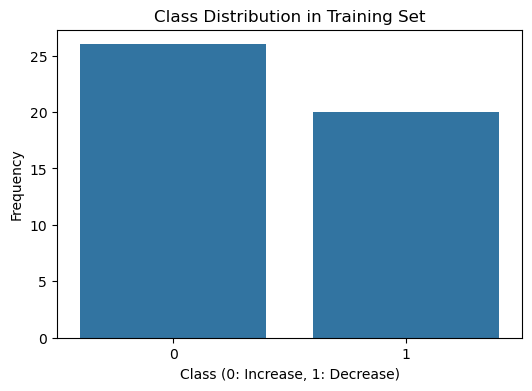

In [197]:
#A plot highlighting this
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_bin)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class (0: Increase, 1: Decrease)")
plt.ylabel("Frequency")
plt.show()

### Addressing Class Imbalance in Logistic Regression

Class imbalance occurs when one class is significantly more frequent than the other in a dataset, which can lead to biased predictions from the model. In such cases, the model may become biased towards the majority class, resulting in poor performance for the minority class.

To assess class imbalance, we can calculate the class distribution using `np.bincount(y_train_bin)`. Upon doing this, we observe an imbalance between the two categories in our training set.

#### Solution: Using `class_weight='balanced'` in Logistic Regression

To mitigate the effect of class imbalance, I used the `class_weight='balanced'` parameter in the Logistic Regression model. This parameter adjusts the weights inversely proportional to the class frequencies, meaning that it assigns more weight to the minority class and less to the majority class. By doing this, the model is less likely to favor the majority class and is better able to correctly predict instances of the minority class.

This technique helps improve the model's fairness and performance on imbalanced datasets.


In [1]:


# Store confusion matrices for training and testing
train_cm_list = []
test_cm_list = []

#Store accuracy values
train_accuracy_list = []
test_accuracy_list = []

tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #Fit the model
    model.fit(X_train, y_train)
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    #Calculate accuracy scores
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)

    train_accuracy_list.append(train_acc)
    test_accuracy_list.append(test_acc)


    # Compute confusion matrices
    cm_train = confusion_matrix(y_train, train_preds)
    cm_test = confusion_matrix(y_test, test_preds)

    # Convert to DataFrame for visualization
    train_df = pd.DataFrame(cm_train, columns=["Predicted -1", "Predicted 1"], index=["Actual -1", "Actual 1"])
    test_df = pd.DataFrame(cm_test, columns=["Predicted -1", "Predicted 1"], index=["Actual -1", "Actual 1"])

    # Melt the DataFrames for ggplot format
    train_df = train_df.reset_index().melt(id_vars="index", var_name="Predicted", value_name="Count")
    test_df = test_df.reset_index().melt(id_vars="index", var_name="Predicted", value_name="Count")
    
    train_df = train_df.rename(columns={"index": "Actual"})
    test_df = test_df.rename(columns={"index": "Actual"})
    
    train_cm_list.append(train_df)
    test_cm_list.append(test_df)

    
# Average confusion matrices over the 5 folds
final_train_cm = pd.concat(train_cm_list).groupby(["Actual", "Predicted"]).mean().reset_index()
final_test_cm = pd.concat(test_cm_list).groupby(["Actual", "Predicted"]).mean().reset_index()

#Average the accuracy over the 5 folds
final_train_accuracy = np.mean(train_accuracy_list)
final_test_accuracy = np.mean(test_accuracy_list)

print(f"Average Training Accuracy: {final_train_accuracy:.4f}")
print(f"Average Testing Accuracy: {final_test_accuracy:.4f}")


# Mapping TP, FP, FN, TN labels
label_map = {
    ("Actual -1", "Predicted -1"): "TN",
    ("Actual -1", "Predicted 1"): "FP",
    ("Actual 1", "Predicted -1"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}

# Annotate the matrix
final_train_cm["Annotation"] = final_train_cm.apply(lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {int(row['Count'])}", axis=1)
final_test_cm["Annotation"] = final_test_cm.apply(lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {int(row['Count'])}", axis=1)



NameError: name 'TimeSeriesSplit' is not defined

In [199]:
# Designing a function to Plot Confusion Matrix
def plot_confusion_matrix(df, dataset_name):
    return (
        ggplot(df, aes("Predicted", "Actual", fill="Count"))
        + geom_tile(color="black")
        + geom_text(aes(label="Annotation"), size=10, color="black")
        + scale_fill_gradient(low="white", high="blue")
        + ggtitle(f"{dataset_name} Confusion Matrix (Averaged over {tscv.n_splits} folds)")
        + coord_fixed(ratio=1)
        + theme_minimal()
    )

# Generate and display the plots
p_train_cm = plot_confusion_matrix(final_train_cm, "Training Data")
p_test_cm = plot_confusion_matrix(final_test_cm, "Testing Data")

p_test_cm



### **Why I Used a Confusion Matrix:**
A confusion matrix is a key evaluation tool for classification models, providing a breakdown of **true positives (TP)**, **true negatives (TN)**, **false positives (FP)**, and **false negatives (FN)**. In the context of **predicting changes in interest rates**, it is essential to understand both **correct predictions and misclassifications**, as these directly impact decision-making in financial markets.

### **Context: Interest Rate Predictions and Their Impact**
Interest rate decisions significantly affect financial markets, influencing asset prices, bond yields, and investor sentiment. Many market participants, including **traders, hedge funds, and institutional investors**, make speculative bets on interest rate movements. 

- **If the model incorrectly predicts a rate change (FP)**, investors may **incorrectly position themselves** by adjusting portfolios or executing trades based on a **nonexistent signal**.
- **If the model fails to predict an actual rate change (FN)**, investors may be **caught off guard**, leading to **losses** or missed opportunities which can prove very costly. Given this, its important to **minimise misclassification errors—particularly false negatives—is crucial**.


---

### **Why Use Cross-Validation?**
Rather than evaluating the model on a single train-test split, I used **5-fold cross-validation** to ensure a **robust and generalisable** assessment. This technique:
- **Reduces overfitting** by averaging performance across multiple training/testing splits.
- **Provides a more reliable estimate** of real-world performance, as financial data can be noisy and volatile.
- **Ensures results are not dependent on a single split**, making them **more consistent**.

---



### **Key Observations and Risks**
- **False Negatives (FN = 4)**: The model **failed to detect a rate change** 4 times. This is **problematic** because investors relying on the model may **not anticipate a central bank decision**, leading to **market misalignment** or **losses**.
- **False Positives (FP = 1)**: The model **incorrectly predicted a rate change** once. While less damaging than false negatives, this could still cause **unnecessary trading costs** or **misallocation of capital**.
- **True Positives (TP = 2) & True Negatives (TN = 3)**: The model made **correct predictions** in these cases, but the overall recall (ability to detect rate changes) remains **low**.

---

### **Performance Metrics**
Using the confusion matrix, we derive key evaluation metrics:

- **Precision** = TP / (TP + FP) = **2 / (2 + 1) = 0.67**  
  - When the model predicts a rate change, it is correct **67% of the time**.
- **Recall** = TP / (TP + FN) = **2 / (2 + 4) = 0.33**  
  - The model only detects **33% of actual rate changes**, which is **too low for financial decision-making**.
- **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall) = **0.44**  
  - Indicates a **trade-off between precision and recall**, but low recall suggests **missed opportunities**.

---

### **Why This Is a Problem for Investors**
- **Missed rate changes (False Negatives) and **False predictions (False Positives**) are the biggest issue.** Investors who position themselves expecting stable rates could suffer **significant portfolio losses** when unexpected hikes or cuts occur.
- **Low recall (0.33) suggests that the model needs improvement**, as it fails to identify **most actual rate changes**.


In [200]:
#Creating a dataframe of coefficients, from the column of features
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)

                          Coefficient
rate                        -0.209143
cci_avg_3m                   0.497123
unemployment_rate_avg_3m     0.211567
gilt_yield_avg_3m            1.461383
cpih_rate_avg_3m             0.959217
gva_avg_3m                   0.256344
spot_rate_usd_avg_3m         0.140194
spot_rate_eur_avg_3m         0.088395


### Regression Coefficients Interpretation

The regression coefficients in this model represent the relationship between each economic indicator and the likelihood of a rate change. A positive coefficient indicates that as the indicator increases, the likelihood of a rate change increases, while a negative coefficient suggests the opposite. Here’s a detailed breakdown of the key coefficients:

- **Rate (-0.21)**:  
  A negative coefficient implies that as the interest rate increases, the likelihood of a rate change decreases. This suggests that when the central bank's rate is already high, it might be less likely to adjust it further -  as this squeezes out consumers and investors, as it makes borrowing quite expensive


- **CCI_avg_last_3_months (0.50)**:  
  The positive coefficient indicates that as consumer confidence (CCI) improves, the likelihood of a rate change increases. This implies that when consumers feel more confident about the economy, policymakers may be more inclined to adjust rates - likely to prevent 'overheating' of the economy which can lead to a boom bust cycle

- **Unemployment rate (0.21)**:  
  A positive relationship with the probability of rate changes suggests that higher unemployment may lead to rate adjustments, potentially reflecting efforts to stimulate economic activity during periods of higher unemployment.

- **10-year-gilt-yield_avg_last_3_months (1.46)**:  
  This coefficient is relatively large, suggesting a strong influence of long-term bond yields on the likelihood of a rate change. A higher 10-year gilt yield likely signals higher borrowing costs or inflationary expectations, prompting a rate adjustment - Additionally, the expected 10 year guilt equation would be given by:
  The expected 10-year gilt yield equation is:

  $$ 
  (1 + y_{10}) = (1 + i_t) \times (1 + \text{inflation expectations})^{10} 
  $$

  Where:
  - \( y_{10} \) is the 10-year gilt yield  
  - \( i_t \) is the current short-term interest rate  
  - Inflation expectations reflect the anticipated inflation over the next 10 years.

  This formula shows how the 10-year gilt yield depends on current interest rates and expected inflation, with higher expectations for inflation or borrowing costs leading to a higher 10-year yield.
- **CPIH MONTHLY RATE_avg_last_3_months (0.96)**:  
  This positive coefficient implies that higher inflation, as measured by the CPIH, increases the probability of a rate change, which aligns with central banks' typical response to rising inflation by increasing rates.

- **Gross Value Added (0.26)**:  
  This variable, indicating economic output, has a positive relationship with the likelihood of rate changes. It suggests that economic growth could lead to tightening measures by the central bank.

- **Monthly average Spot exchange rate (0.14 and 0.09)**:  
  These coefficients suggest that fluctuations in the exchange rate have a moderate influence on the likelihood of a rate change. This reflects central bank concerns about currency stability and external economic pressures.




___

### Designing my own model

In [201]:
#Checking column names for lagging
df.columns

Index(['date', 'rate', 'rate_change', 'cci_avg_3m', 'unemployment_rate_avg_3m',
       'gilt_yield_avg_3m', 'cpih_rate_avg_3m', 'gva_avg_3m',
       'spot_rate_usd_avg_3m', 'spot_rate_eur_avg_3m'],
      dtype='object')

In [202]:
#Designing a function used for lagging variables
def create_lagged_features(df):
    ''' Creating a function to lag varaibles by the previous month's value '''
    df['Unemployment_rate_lag_1'] = df['unemployment_rate_avg_3m'].shift(1)
    df['CCI_avg_lag_1'] = df['cci_avg_3m'].shift(1)
    df.dropna(inplace=True)
    
    return df

df_for_tree = create_lagged_features(df)

In [204]:

#Define features & target
X = df.drop(columns=['rate_change', 'date'])
y = df['rate_change']



#Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

#Define Model
gbc = GradientBoostingClassifier(random_state=42)

#Define Hyperparameter Grid
grid_space = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7]
}

# Randomized Search for Best Parameters
grid_search = RandomizedSearchCV(gbc, grid_space, cv=tscv, n_iter=10, scoring="accuracy", n_jobs=-1, random_state=42)
grid_search.fit(X, y)

#Best Model
best_gbc = grid_search.best_estimator_

#Split Data for Final Evaluation
train_index, test_index = list(tscv.split(X))[-1]  # Last fold for final test
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#Fit Best Model
best_gbc.fit(X_train, y_train)
y_pred = best_gbc.predict(X_test)



#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, columns=["Predicted -1", "Predicted 1"], index=["Actual -1", "Actual 1"])

# Melt DataFrame for ggplot
cm_df = cm_df.reset_index().melt(id_vars="index", var_name="Predicted", value_name="Count")
cm_df = cm_df.rename(columns={"index": "Actual"})

#Mapping Labels
label_map = {
    ("Actual -1", "Predicted -1"): "TN",
    ("Actual -1", "Predicted 1"): "FP",
    ("Actual 1", "Predicted -1"): "FN",
    ("Actual 1", "Predicted 1"): "TP",
}
cm_df["Annotation"] = cm_df.apply(lambda row: f"{label_map[(row['Actual'], row['Predicted'])]}: {int(row['Count'])}", axis=1)


# Display Plot using the function from before
plot_confusion_matrix(cm_df, "Gradient Boosting Confusion Matrix")



In [205]:
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Final Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Final Test Accuracy: 0.8182
Precision: 0.8182
Recall: 1.0000
F1 Score: 0.9000


My choice to combat the shortfalls of logisitc regression was to utilise, **Gradient Boosting**. It builds trees sequentially, allowing each new tree to correct the errors of the previous ones. Unlike **Logistic Regression**, which assumes a linear relationship between features and the target variable, Gradient Boosting can capture **non-linear patterns and complex feature interactions**. This makes it more suitable for predicting economic trends, where relationships between variables are rarely straightforward.

To ensure reliable evaluation, I continued to use **Time Series Cross-Validation (TSCV)** instead of a standard train-test split. This method respects the chronological order of data, preventing **data leakage** and better simulating real-world forecasting, where future predictions must rely only on past observations.


### Hyperparameter Tuning Strategy

Hyperparameter tuning was performed using **RandomizedSearchCV**, which efficiently searches for the best model configuration by sampling a subset of hyperparameter combinations instead of testing all possible values.

The chosen **search space** was:

```python
grid_space = {
    "n_estimators": [100, 200, 300],  # Number of boosting iterations
    "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    "max_depth": [3, 5, 7]  # Depth of each tree to control model complexity
}

```  

- n_estimators (100, 200, 300):
More estimators increase the model’s ability to learn complex patterns, but too many can lead to overfitting. The range was chosen to balance performance and computation time.
learning_rate (0.01, 0.1, 0.2):
- Lower learning rates (e.g., 0.01) make the model learn more slowly and require more estimators, while higher values (e.g., 0.2) may speed up learning but risk missing the optimal solution. These values allow a trade-off between stability and convergence speed.
- max_depth (3, 5, 7):
A higher depth enables the model to capture more intricate patterns, but too deep trees can overfit. Depth values were chosen based on a balance between capturing non-linearity and controlling model complexity.




The Gradient Boosting model achieved an **accuracy of 0.8182**, a significant improvement over the **baseline Logistic Regression model, which had an accuracy of 0.4727**. This suggests that the Gradient Boosting model is better at identifying rate changes, although we should be careful about class imbalance

The confusion matrix provides further insights:

- **True Positives (TP): 9** – Correctly identified rate changes.
- **False Positives (FP): 2** – Incorrectly predicted rate changes.
- **False Negatives (FN): 0** – No actual rate changes were missed.
- **True Negatives (TN): 0** – No stable rate predictions in this test fold.

The model effectively captures **all actual rate changes (no false negatives)** while minimizing false positives. This is a crucial improvement, as failing to detect rate changes could lead to missed opportunities in financial decision-making.

Compared to the Logistic Regression model, this approach demonstrates **a much stronger predictive ability**. The combination of **Gradient Boosting and robust resampling with TSCV** has clearly resulted in a more effective forecasting model.

**However** it's important to note that with such a small sample size, results cannot be taken completely at face value and if I was to repeat this exercise in different settings I would hope for a larger sample size


##### Because of the small sample size however, it would be smart to use cross validation here:

In [206]:
cv_precision = cross_val_score(best_gbc, X_train, y_train, cv=5, scoring='precision')
cv_recall = cross_val_score(best_gbc, X_train, y_train, cv=5, scoring='recall')
cv_f1 = cross_val_score(best_gbc, X_train, y_train, cv=5, scoring='f1')

print(f"Mean Precision: {cv_precision.mean():.4f}")
print(f"Mean Recall: {cv_recall.mean():.4f}")
print(f"Mean F1: {cv_f1.mean():.4f}")

Mean Precision: 0.6350
Mean Recall: 0.8400
Mean F1: 0.7174


To ensure the robustness of my gradient boosting model, I chose to use **cross-validation (CV)** due to the small sample size of my test set. CV provides a more generalized estimate of performance by splitting the data into multiple folds, reducing the risk of overfitting and giving a clearer understanding of how the model performs across different subsets of data. In evaluating the model, I used three common performance metrics: **precision**, **recall**, and **F1-score**. Precision measures the accuracy of positive predictions, recall focuses on the model's ability to identify true positives, and the F1-score combines both precision and recall into a single metric. Given the **precision-recall tradeoff**, where increasing recall often decreases precision (and vice versa), which can be seen by the 0.64 mean precision but 0.84 mean recall I found that the F1-score provides a more balanced and comprehensive measure of performance. This is particularly useful in situations with imbalanced datasets, where maximising both recall and precision is crucial. By optimizing the F1-score, I could ensure that the model is not biased towards false positives or false negatives, delivering a more reliable overall performance. The mean F1 score, beats that of the logistic regression


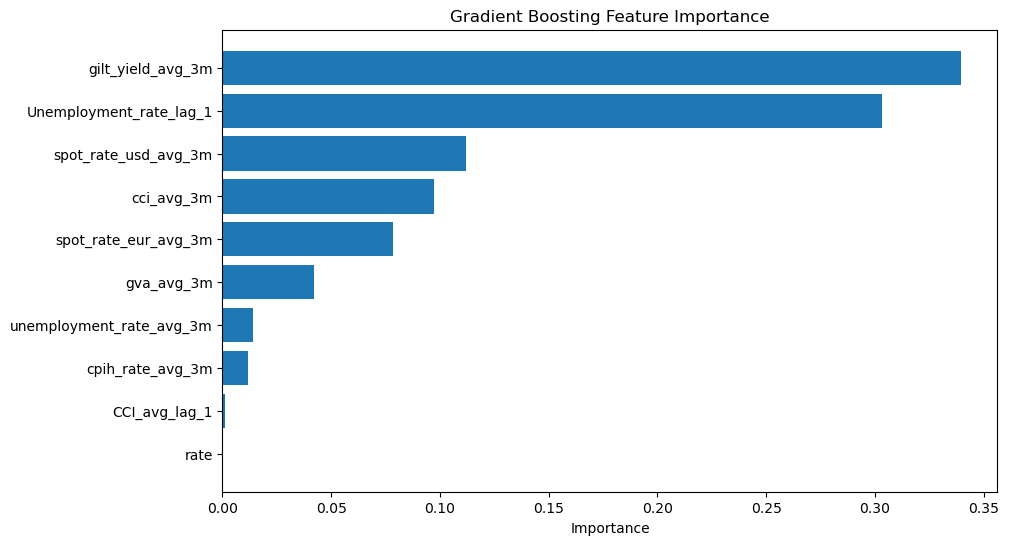

In [207]:
# Get feature importances
importances = best_gbc.feature_importances_

# Create a DataFrame for plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances (taken directly from week 5 lecture)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()  
plt.show()

As seen above, and perhaps as predicted from before, the 10 year guilt avaerage of the last 3 months takes the greatest importance, given it's direct involvement with rate setting deisions

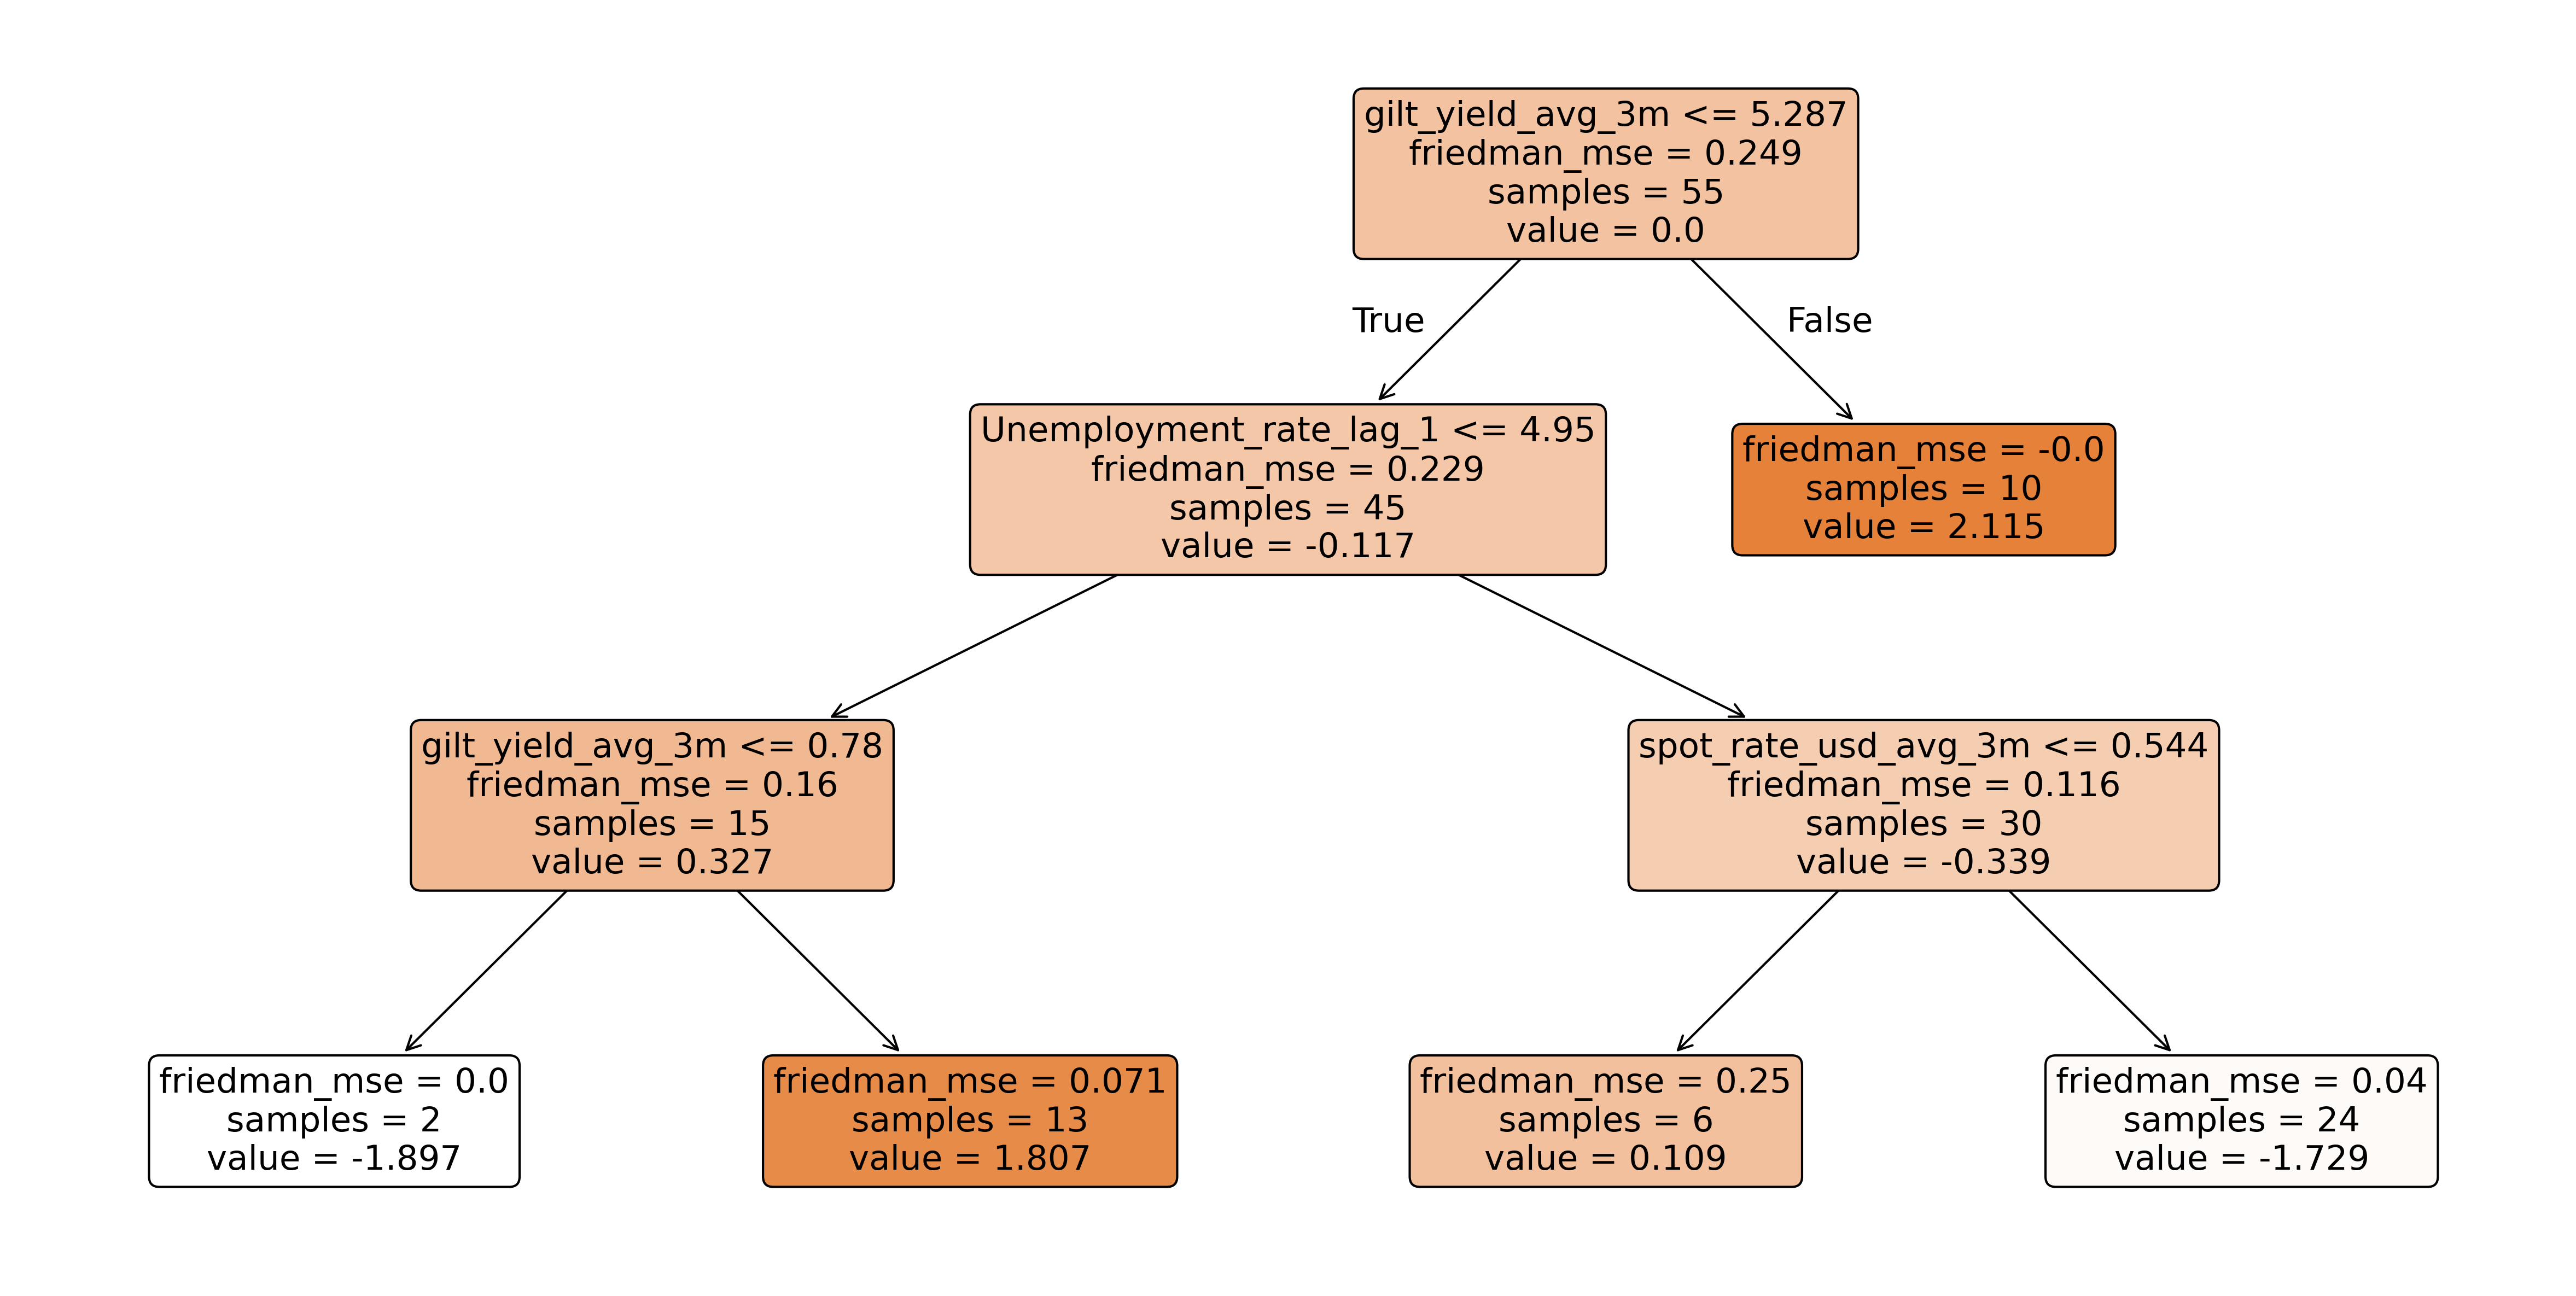

In [208]:


plt.figure(figsize=(20, 10), dpi=300)  # Higher DPI improves clarity
tree.plot_tree(best_gbc.estimators_[0, 0], filled=True, feature_names=X_train.columns, rounded=True)
plt.show()


### Decision Tree Visualization  

The plot represents a decision tree from the Gradient Boosting model, illustrating how the model makes predictions based on different features. Each node represents a decision split on a specific feature, with conditions determining how the data is divided. The top node is the root, where the first and most important split occurs.  

Each branch represents a path the model follows based on feature values. The leaf nodes (end boxes) contain the final predicted values. The "friedman_mse" metric at each node represents the mean squared error reduction at that split, indicating how much the decision improves the prediction.  

Darker nodes indicate stronger predictions (higher absolute values), while lighter nodes suggest lower impact. This however is just one of many in the Gradient Boosting ensemble, where multiple trees combine to refine the final prediction.  

### After all this i could do with a somali pancake (malawax) 😋


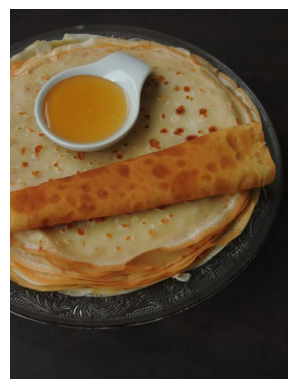

In [213]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread('img1.jpeg')  


plt.imshow(img)
plt.axis('off')  
plt.show()